# Simple Recurrent Neural Network on IMDB dataset from Keras

In [1]:
import numpy
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [3]:
print(x_train[0])
print(len(x_train[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [4]:
word_idx = imdb.get_word_index()
# print(word_idx)

In [5]:
# Create 2D tensor as input for embedding layer
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [6]:
model = Sequential()
model.add(Embedding(10000, 16))
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,545
Trainable params: 160,545
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

c:\users\goura\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 35s 2ms/step - loss: 0.5746 - accuracy: 0.6857 - val_loss: 0.4561 - val_accuracy: 0.7926
Epoch 2/5
20000/20000 [==============================] - 34s 2ms/step - loss: 0.3711 - accuracy: 0.8467 - val_loss: 0.3827 - val_accuracy: 0.8366
Epoch 3/5
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2744 - accuracy: 0.8920 - val_loss: 0.3618 - val_accuracy: 0.8456
Epoch 4/5
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2032 - accuracy: 0.9265 - val_loss: 0.3509 - val_accuracy: 0.8582
Epoch 5/5
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1613 - accuracy: 0.9455 - val_loss: 0.3795 - val_accuracy: 0.8524


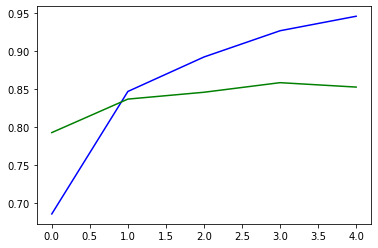

In [9]:
plt.plot(hist.history['accuracy'], c='b')
plt.plot(hist.history['val_accuracy'], c='g')
plt.show()

In [11]:
# model.save('my_model.h5')
print(model.evaluate(x_test, y_test))

25000/25000 [==============================] - 38s 2ms/step
[0.3977021158981323, 0.8457199931144714]
